<a href="https://colab.research.google.com/github/harshgupta9723/Digit-recognition/blob/master/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIGIT RECOGNITION

In [ ]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss

# Data analysis and visualization on MNIST data

In [ ]:
# Importing mnist data
# Data is available in splited format of train and set

project_data = pd.read_csv('train.csv').sample(frac=0.5)

# print row of project_data
print(project_data.head(5))

# save the labels into a variable label
# lable conatins the digit which is represented by pixels

label = project_data['label']

# Drop the label feature and store the pixel data into variable data.
# each row in data contains 784 pixels i.e each image is consists of 784 pixels

data = project_data.drop("label",axis=1)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
24377      2       0       0       0  ...         0         0         0         0
39561      1       0       0       0  ...         0         0         0         0
1805       6       0       0       0  ...         0         0         0         0
25476      9       0       0       0  ...         0         0         0         0
34008      7       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


In [ ]:
# Explaination about image

print("This represents (no. of rows, no. of columns) in the data - ",data.shape)
print("no. of lables - ",label.shape)

This represents (no. of rows, no. of columns) in the data -  (21000, 784)
no. of lables -  (21000,)


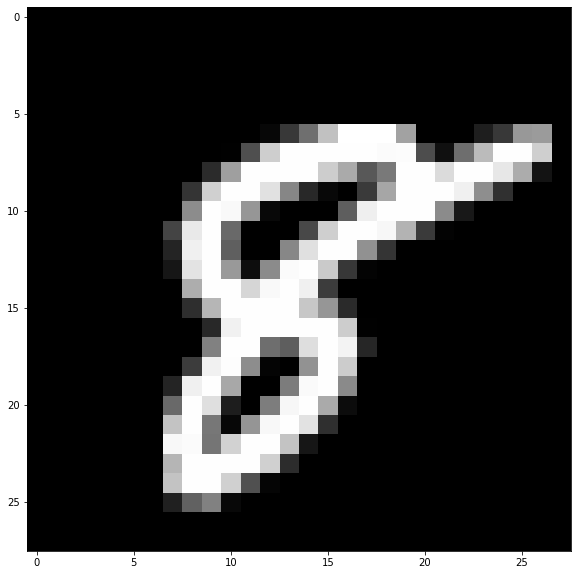

In [ ]:
# display or plot a number.


# data.iloc[1] - function is used to get row of given index (mainly used when data is not provided in index)
# .to_numpy() - function is used to convert given row into numpy array, to further convert it into (28,28) pixels
# .reshape(28,28) - function is used to convert 784 pixel data point into 28 rows and 28 columns

index = 8

grid_data = data.iloc[index].to_numpy().reshape(28,28)

# figsize is used to define size of the image
plt.figure(figsize=(10,10))

# imshow plot numpy array (28,28)
plt.imshow(grid_data,cmap = "gray")

# Split data

In [ ]:
X = data
y = label

xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.2)
xtrain, xcv, ytrain, ycv = train_test_split(xtrain, ytrain, stratify=ytrain, test_size=0.2)

# Encoding techniques 

In [ ]:
# Data-preprocessing: normalizing the data

xtrain_normalized = preprocessing.normalize(xtrain)
xtest_normalized = preprocessing.normalize(xtest)
xcv_normalized = preprocessing.normalize(xcv)

# Model taining

for alpha = 1e-06
Log Loss : 0.42675641063309233
for alpha = 1e-05
Log Loss : 0.39313433329669234
for alpha = 0.0001
Log Loss : 0.47976715254476554
for alpha = 0.001
Log Loss : 0.8207150305461157
for alpha = 0.01
Log Loss : 1.619562638992681
for alpha = 0.1
Log Loss : 2.1956746560196314
for alpha = 1
Log Loss : 2.2934845994386572
for alpha = 10
Log Loss : 2.305591772569736
for alpha = 100
Log Loss : 2.304241017892317


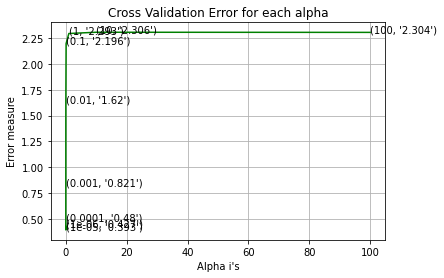

In [ ]:
# hyper parameter tuning of sgd classifier

# declare range of alpha(hyper parameter)
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)

    # use class_weight = 'balanced' for imbalanced dataset
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(xtrain_normalized, ytrain)

    clf_probs = clf.predict_proba(xcv_normalized)
    cv_log_error_array.append(log_loss(ycv, clf_probs, labels=clf.classes_, eps=1e-15))

    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(ycv, clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')

for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))

plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
# train model for on best hyper parameter

clf = SGDClassifier(class_weight='balanced', alpha=1e-05, penalty='l2', loss='log',random_state=42)
clf.fit(xtrain_normalized, ytrain)

predict_y = clf.predict_proba(xtrain_normalized)
print('For values of best alpha = ', 1e-05, "The train log loss is:",log_loss(ytrain, predict_y, labels=clf.classes_))

predict_y = clf.predict_proba(xcv_normalized)
print('For values of best alpha = ', 1e-05, "The cross validation log loss is:",log_loss(ycv, predict_y, labels=clf.classes_))

predict_y = clf.predict_proba(xtest_normalized)
print('For values of best alpha = ', 1e-05, "The test log loss is:",log_loss(ytest, predict_y, labels=clf.classes_))

For values of best alpha =  1e-05 The train log loss is: 0.34003454684569584
For values of best alpha =  1e-05 The cross validation log loss is: 0.39313433329669234
For values of best alpha =  1e-05 The test log loss is: 0.37663787946624716


In [ ]:
y_train_pred = clf.predict(xtrain_normalized)
print('train accuracy %s' % accuracy_score(y_train_pred, ytrain))

y_test_pred = clf.predict(xtest_normalized)
print('test accuracy %s' % accuracy_score(y_test_pred, ytest))

train accuracy 0.9167410714285714
test accuracy 0.905952380952381


In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    plot = confusion_matrix(test_y, predict_y)

    labels = [1,2,3,4,5,6,7,8,9,0]

    print("Confusion matrix")
    plt.figure(figsize=(20,7))
    sns.heatmap(plot, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Confusion matrix


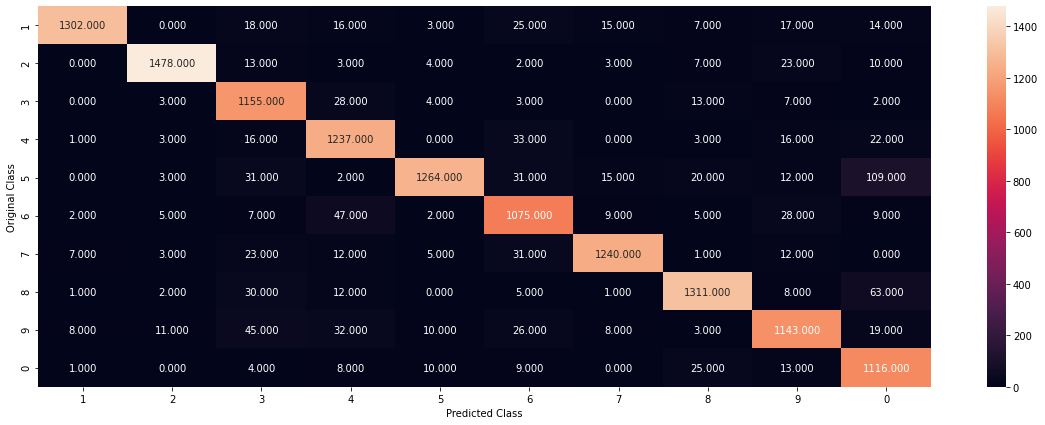

In [ ]:
plot_confusion_matrix(y_train_pred, ytrain)

# Predict a data point

In [ ]:
actual_point = list(ytest)[0]
print("Actual point - ", actual_point)

predicted_point = clf.predict(xtest_normalized[0].reshape(1, -1))
print("predicted point - ", predicted_point)

Actual point -  8
predicted point -  [8]
